In [68]:
# importing the necesary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [69]:
# importing data and reading few lines
df = pd.read_csv("/content/sample_data/Food_Delivery_Time_Prediction.csv")
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [70]:
# gathering data of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [71]:
# checking for null and summing them up
print(df.isnull().sum())

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [72]:
# describing the statistical/mathematical features of the data
print(df['Distance'].describe())

invalid_distance = df[df['Distance'] < 0]
print(invalid_distance)

count    200.000000
mean      11.498050
std        6.841755
min        0.520000
25%        6.090000
50%       10.265000
75%       16.497500
max       24.900000
Name: Distance, dtype: float64
Empty DataFrame
Columns: [Order_ID, Customer_Location, Restaurant_Location, Distance, Weather_Conditions, Traffic_Conditions, Delivery_Person_Experience, Order_Priority, Order_Time, Vehicle_Type, Restaurant_Rating, Customer_Rating, Delivery_Time, Order_Cost, Tip_Amount]
Index: []


In [73]:
# describing the ordertime of the dataframe
print(df['Order_Time'].describe())


count           200
unique            4
top       Afternoon
freq             59
Name: Order_Time, dtype: object


In [74]:
# encoding the data
encoder = LabelEncoder()

df['Weather_Conditions'] = encoder.fit_transform(df['Weather_Conditions'])
df['Traffic_Conditions'] = encoder.fit_transform(df['Traffic_Conditions'])
df['Order_Priority'] = encoder.fit_transform(df['Order_Priority'])
df['Order_Time'] = encoder.fit_transform(df['Order_Time'])
df['Vehicle_Type'] = encoder.fit_transform(df['Vehicle_Type'])

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    int64  
 5   Traffic_Conditions          200 non-null    int64  
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    int64  
 8   Order_Time                  200 non-null    int64  
 9   Vehicle_Type                200 non-null    int64  
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [75]:
# normalizing the data
scaler = MinMaxScaler()

columns_to_scale = ['Distance', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df[columns_to_scale].head())


   Distance  Delivery_Time  Order_Cost  Tip_Amount
0  0.043068       0.105228    0.639319    0.815228
1  0.853158       0.453658    0.015951    0.282030
2  0.263741       0.317886    0.811724    0.638883
3  0.544299       0.923018    0.223426    0.791777
4  0.254307       0.164209    0.265322    0.011168


In [76]:
#  calculating the mean of the data
mean1 = df['Distance'].mean()
print("Mean of Distance:", mean1)

mean2 = df['Delivery_Person_Experience'].mean()
print("Mean of Delivery Person Experience:", mean2)

mean3 = df['Order_Cost'].mean()
print("Mean of Order Cost:", mean3)

mean4 = df['Tip_Amount'].mean()
print("Mean of Tip Amount:", mean4)


Mean of Distance: 0.4502891714520099
Mean of Delivery Person Experience: 5.25
Mean of Order Cost: 0.49286909637783183
Mean of Tip Amount: 0.46067664974619277


In [77]:
# calculating the median of the data
median1 = df['Distance'].median()
print("Median of Distance:", median1)

median2 = df['Delivery_Person_Experience'].median()
print("Median of Delivery Person Experience:", median2)

median3 = df['Order_Cost'].median()
print("Median of Order Cost:", median3)

median4 = df['Tip_Amount'].median()
print("Median of Tip Amount:", median4)

Median of Distance: 0.3997128794093519
Median of Delivery Person Experience: 5.0
Median of Order Cost: 0.48724881607577103
Median of Tip Amount: 0.4699492385786802


In [78]:
# mode of the data
mode1 = df['Distance'].mode()
print("Mode of Distance:", mode1)

mode2 = df['Delivery_Person_Experience'].mode()
print("Mode of Delivery Person Experience:", mode2)

mode3 = df['Order_Cost'].mode()
print("Mode of Order Cost:", mode3)

mode4 = df['Tip_Amount'].mode()
print("Mode of Tip Amount:", mode4)


Mode of Distance: 0    0.032814
1    0.111977
2    0.156276
3    0.228466
4    0.281378
5    0.301477
6    0.354799
7    0.388843
8    0.393355
Name: Distance, dtype: float64
Mode of Delivery Person Experience: 0    8
Name: Delivery_Person_Experience, dtype: int64
Mode of Order Cost: 0    0.901782
Name: Order_Cost, dtype: float64
Mode of Tip Amount: 0    0.009949
1    0.232690
Name: Tip_Amount, dtype: float64


In [79]:
# variance of the data
variance_columns = ['Distance', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']

for col in variance_columns:
    print(f"Variance of {col}:", df[col].var())

Variance of Distance: 0.07875310452529885
Variance of Delivery_Time: 0.08158174620669842
Variance of Order_Cost: 0.08558630315889922
Variance of Tip_Amount: 0.08885668873911667


In [80]:
# analyzing the correlation data
numeric_df = df.select_dtypes(include=['number'])

correlation = numeric_df.corr()['Delivery_Time']
print(correlation)

Distance                     -0.075143
Weather_Conditions           -0.021580
Traffic_Conditions            0.040023
Delivery_Person_Experience   -0.019098
Order_Priority               -0.013405
Order_Time                   -0.008725
Vehicle_Type                 -0.055576
Restaurant_Rating            -0.091855
Customer_Rating              -0.021952
Delivery_Time                 1.000000
Order_Cost                   -0.009307
Tip_Amount                   -0.029154
Name: Delivery_Time, dtype: float64


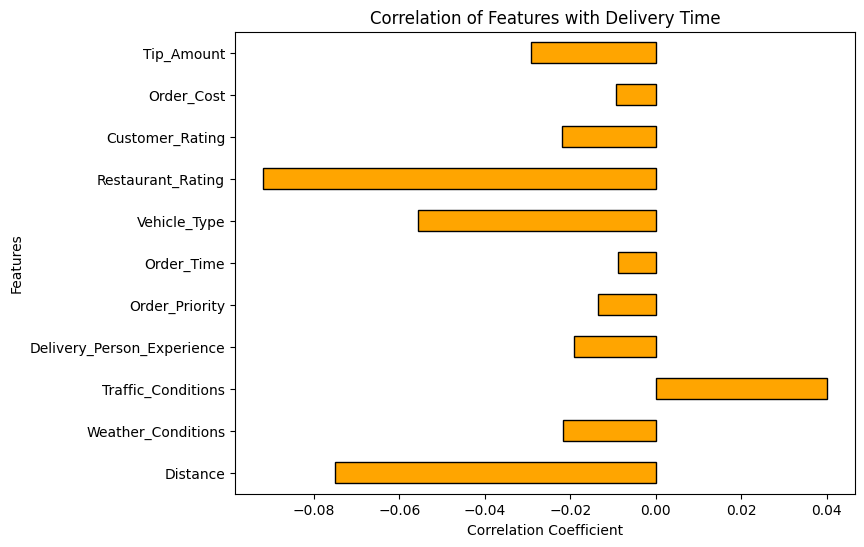

In [81]:
# visualizing the correlation data
plt.figure(figsize=(8, 6))
correlation.drop(['Delivery_Time']).plot(
    kind='barh', color='orange', edgecolor='black'
)
plt.title('Correlation of Features with Delivery Time')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


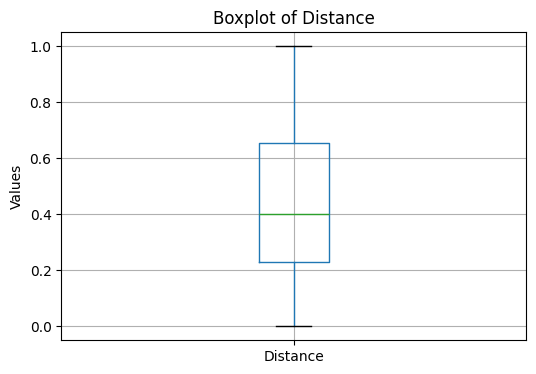

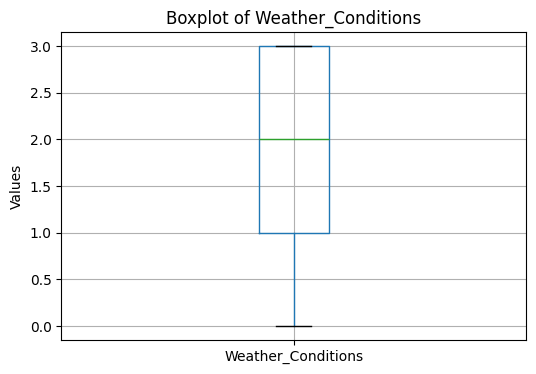

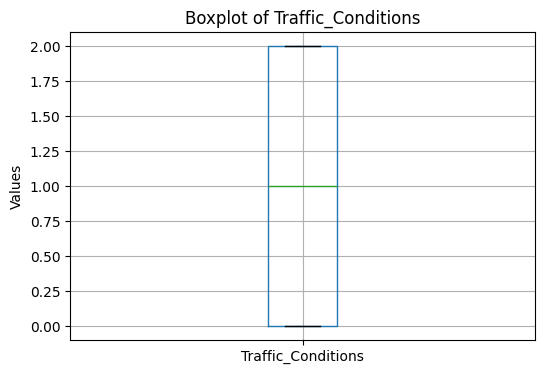

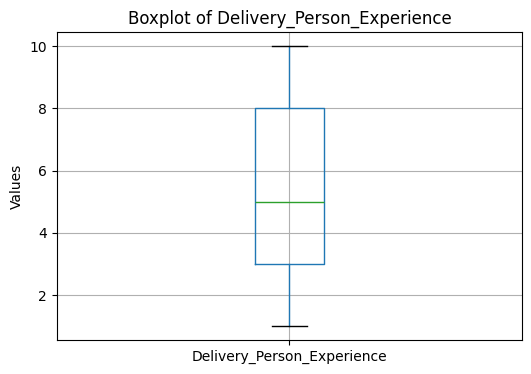

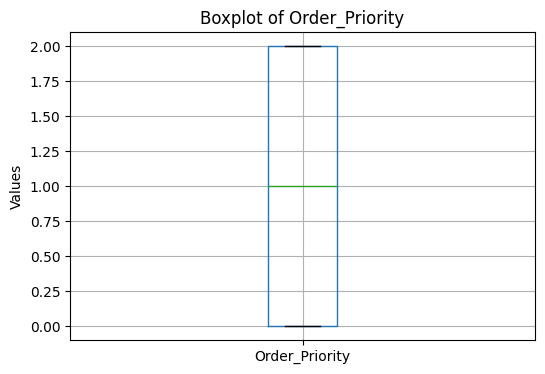

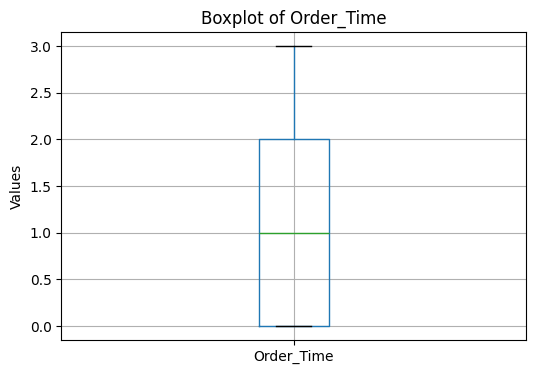

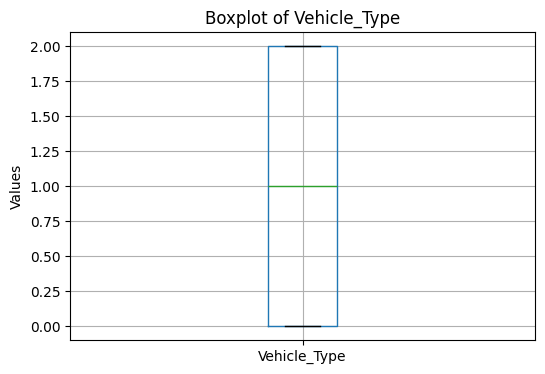

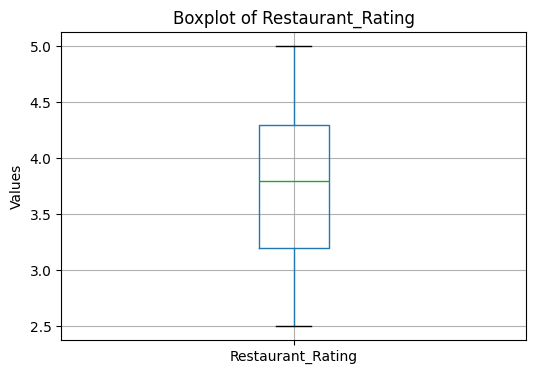

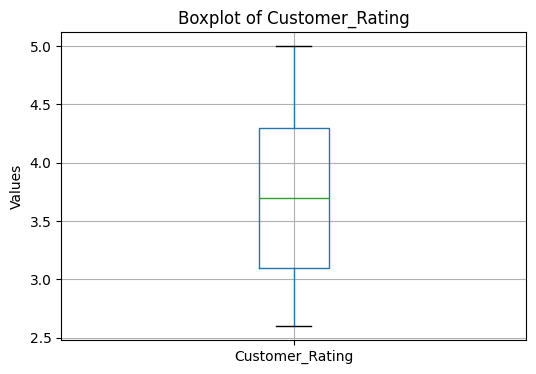

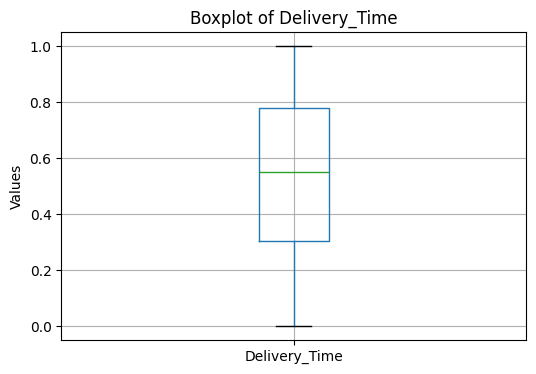

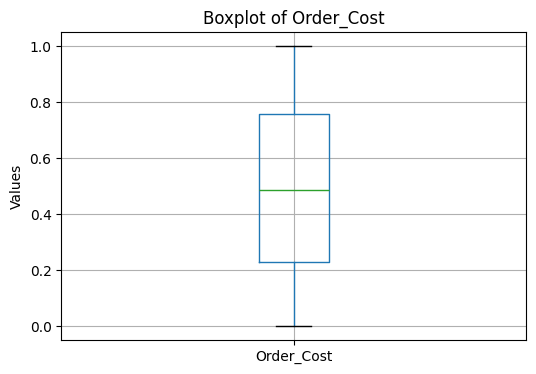

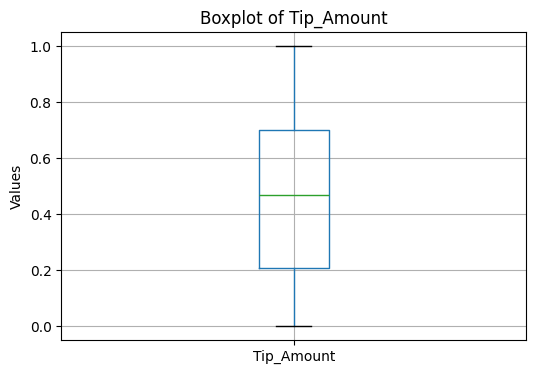

In [82]:
# searching for the outliers of the data
for col in numeric_df:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()


In [83]:
# selecting the features and target for the linear reression also splitting the data
X = df[['Distance', 'Order_Priority', 'Traffic_Conditions', 'Weather_Conditions']]
y = df[['Delivery_Time']]
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [84]:
# making the model and taining it
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [85]:
# making the predictions
pred = model.predict(X_test)
print(pred)


[[0.50761447]
 [0.52404947]
 [0.49405055]
 [0.51355827]
 [0.52439209]
 [0.51954373]
 [0.52754543]
 [0.53108037]
 [0.5561305 ]
 [0.53116495]
 [0.51853725]
 [0.53060198]
 [0.54400025]
 [0.53429959]
 [0.54011278]
 [0.53713421]
 [0.50541087]
 [0.5466502 ]
 [0.52328439]
 [0.53382557]
 [0.50485702]
 [0.51815927]
 [0.52127364]
 [0.53985189]
 [0.52166481]
 [0.53847371]
 [0.53453988]
 [0.53618005]
 [0.5278409 ]
 [0.52997929]
 [0.52581475]
 [0.53944452]
 [0.53837251]
 [0.54975938]
 [0.5261352 ]
 [0.53775909]
 [0.51953667]
 [0.51664687]
 [0.54659503]
 [0.5389856 ]]


In [86]:
# model evalutaion
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 0.24248837072522944
Mean Squared Error: 0.08329468260660129


In [87]:
# now heading for the logistic regerssion
X_log = df[['Weather_Conditions', 'Traffic_Conditions', 'Delivery_Person_Experience']]

Y_log = (df['Delivery_Time'] > 0.5).astype(int)
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)
model1 = LogisticRegression()
model1.fit(X_train_log, Y_train_log)


LogisticRegression()

In [88]:
# making the predictions
pred1 = model1.predict(X_test_log)
print(pred1)


[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1]


In [89]:
#  printing the results
print(classification_report(Y_test_log, pred1))


              precision    recall  f1-score   support

           0       0.33      0.12      0.17        17
           1       0.56      0.83      0.67        23

    accuracy                           0.53        40
   macro avg       0.45      0.47      0.42        40
weighted avg       0.46      0.53      0.46        40



In [90]:
# human readable outcomes
if pred1[0] == 1:
    print("Delayed")
else:
    print("Fast")


Delayed


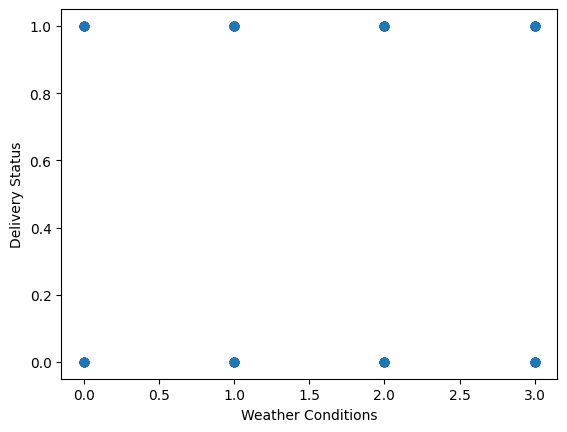

In [91]:
# plotting the scatterplot
df_weather = df['Weather_Conditions']

plt.scatter(df_weather, Y_log)
plt.xlabel("Weather Conditions")
plt.ylabel("Delivery Status")
plt.show()


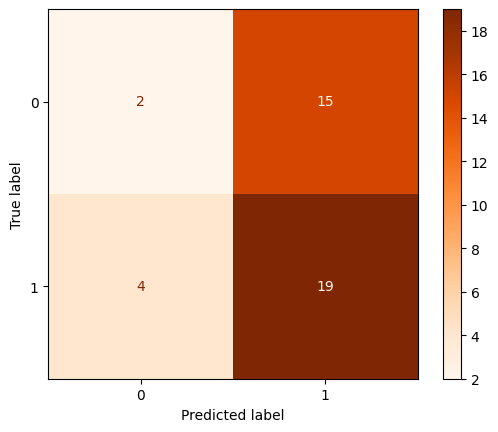

In [92]:
# plotting the confusion matrix
c_matrix = confusion_matrix(Y_test_log, pred1)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot(cmap=plt.cm.Oranges)
plt.show()
